<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-PabAleBravo/blob/main/Semana_5_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.preprocessing import StandardScaler #Normalizar
from matplotlib import pyplot

In [38]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv")

In [39]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Limpieza de datos

Datos vacios

In [41]:
# Buscar los espacios vacios y convertirlos en NAN
#En esta base los vacios se representan con "?"

df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [42]:
#identificar cuantos estan vacios
df.isnull().sum() 

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Vamos a llenar los espacios con la media de los datos

In [43]:
#Obtener la medida de los datos

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_bore)

avg_horsepower =df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", avg_bore)

avg_peakrpm =df['peak-rpm'].astype('float').mean(axis=0)
print("Average of peak-rpm:", avg_bore)

Average of normalized-losses: 122.0
Average of bore: 3.3290499999999996
Average of stroke: 3.3290499999999996
Average of horsepower: 3.3290499999999996
Average of peak-rpm: 3.3290499999999996


In [44]:
#Remplazar los datos con la media

df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df["stroke"].replace(np.nan, avg_bore, inplace=True)
df["horsepower"].replace(np.nan, avg_bore, inplace=True)
df["peak-rpm"].replace(np.nan, avg_bore, inplace=True)

In [45]:
#para ver que tipo de información contiene una columna
df['num-of-doors'].value_counts()

four    114
two      88
Name: num-of-doors, dtype: int64

In [46]:
#Nos dice cual es el valor que más se repite en los datos de una columna
df['num-of-doors'].value_counts().idxmax()

'four'

In [47]:
#En esta columna vamos a remplazar los valores por el dato que se repite más
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [13]:
#Los demas datos faltantes los quitaremos de la base de datos
df.dropna(subset=["price"], axis=0, inplace=True)

In [48]:
#Vamos a restablecer el índice, porque eliminamos dos filas
df.reset_index(drop=True, inplace=True)

In [49]:
#Comprobamos que ya no tenemos datos vacios
df.isnull().sum() 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

Formato de los datos

In [50]:
#Identificamos el tipo de datos de cada columna
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [51]:
#Cambiamos a float las siguentes columnas
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [52]:
#verificamos el cambio
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Estandarización de datos**

> Los datos generalmente se recopilan de diferentes agencias en diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos donde restamos la media y dividimos por la desviación estándar).


¿Qué es la estandarización?

> La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.


Ejemplo

Transformar mpg a L/100km:

>En nuestro conjunto de datos, las columnas de consumo de combustible "city-mpg" y "highway-mpg" están representadas por unidades de mpg (millas por galón). Supongamos que estamos desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L/100km.

>Tendremos que aplicar la transformación de datos para transformar mpg en L/100km.

>La fórmula para la conversión de unidades es:

>L/100km = 235 / millas por galón

In [53]:
#Transformamops los datos con la información anterior

df['city-L/100km'] = 235/df["city-mpg"]
df['highway-mpg-L/100km'] = 235/df["highway-mpg"]

In [54]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-mpg-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,9.400000


**Normalización de datos**

¿Por qué normalización?

>La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable oscilen entre 0 y 1.

Ejemplo

Para demostrar la normalización, digamos que queremos escalar las columnas "largo", "ancho" y "alto".

In [55]:
#Forma Manual
##  df['length'] = df['length']/df['length'].max()
##  df['width'] = df['width']/df['width'].max()
##  df['height'] = df['height']/df['height'].max() 

#Utilizando StandarScaler
dfmedidas = df[["length","width","height"]]
dfmedidas = pd.DataFrame(StandardScaler().fit_transform(dfmedidas))
dfmedidas.columns = ["length","width","height"]
dfmedidas.head()

,length,width,height
0,-0.427756,-0.848336,-2.045937
1,-0.233137,-0.194572,-0.557688
2,0.204755,0.132309,0.227777
3,0.204755,0.225704,0.227777
4,0.261519,0.179007,-0.268306


**Agrupación**

¿Por qué agrupar?
>El agrupamiento es un proceso de transformación de variables numéricas continuas en 'bins' categóricos discretos para el análisis agrupado.

Ejemplo:

>En nuestro conjunto de datos, "horsepower" es una variable de valor real que va de 48 a 288 y tiene 59 valores únicos. ¿Qué pasa si solo nos preocupamos por la diferencia de precio entre autos de alta potencia, potencia media y poca potencia (3 tipos)? ¿Podemos reorganizarlos en tres "bins" para simplificar el análisis?

Usaremos el método de pandas 'cortar' para segmentar la columna 'horsepower' en 3 bins.

In [56]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

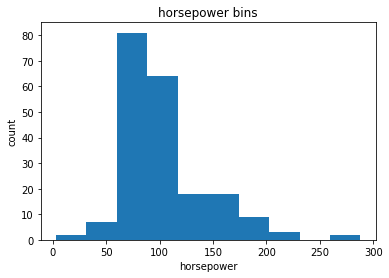

In [57]:
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [58]:
#Necesitamos el minimo, el máximo y el número de grupos, como en esta caso necesitamos 3 grupos se divide en 4 partes (0,1,2,3)
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([  3.,  98., 193., 288.])

In [59]:
group_names = ['Low', 'Medium', 'High']

In [60]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Medium
1,154,Medium
2,102,Medium
3,115,Medium
4,110,Medium
5,110,Medium
6,110,Medium
7,140,Medium
8,160,Medium
9,101,Medium


In [61]:
#Vemos el resultado, ya no tenemos 59 datos únicos, tenemos 3 y se podrá hacer mejor análisis
df["horsepower-binned"].value_counts()

Low       111
Medium     87
High        6
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

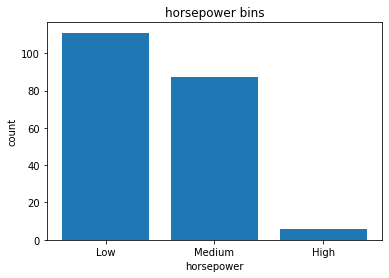

In [62]:
#Graficamos
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

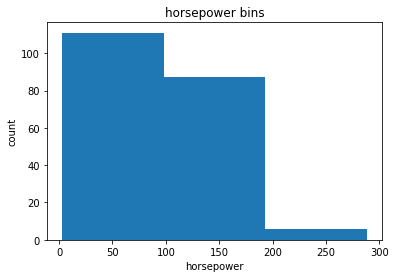

In [63]:
#Graficar el histograma

plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

**Variable indicadora**

Una variable indicadora (o dummy variable) es una variable numérica utilizada para etiquetar categorías. Se les llama 'dummy' porque los números en sí mismos no tienen un significado inherente.

¿Por qué usamos variables indicadoras?

>Usamos variables indicadoras para poder usar variables categóricas para el análisis de regresión en los módulos posteriores.

Ejemplo
Vemos que la columna "tipo de combustible" tiene dos valores únicos: "gas" o "diésel". La regresión no entiende de palabras, sólo de números. Para usar este atributo en el análisis de regresión, convertimos "tipo de combustible" en variables indicadoras.

In [64]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True) #Cambiar los nombres
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [65]:
#Agregamos las columnas que creamos y quitamos la original

df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-mpg-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,177.3,...,110,5500.0,19,25,15250.0,12.368421,9.400000,Medium,0,1


In [68]:
df['aspiration'].value_counts()

std      167
turbo     37
Name: aspiration, dtype: int64

In [69]:
#Realizamos el mismos procedimiento pero con "aspiration"
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-turbo'}, inplace=True) #Cambiar los nombres
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-mpg-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,177.3,66.3,...,19,25,15250.0,12.368421,9.400000,Medium,0,1,1,0


In [ ]:
#Para guardar la nueva base de datos
#df.to_csv('clean_df.csv')

## EXAMEN

In [71]:
df['symboling'] = df['symboling'] + 1
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-mpg-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-turbo
0,4,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
1,2,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,3,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
3,3,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0
4,3,122,audi,two,sedan,fwd,front,99.8,177.3,66.3,...,19,25,15250.0,12.368421,9.400000,Medium,0,1,1,0
